# Template Matching Implementation

This notebook implements template matching using Normalized Cross Correlation (NCC) and Sum of Squared Differences (SSD).

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

In [47]:
def diff_ssd(source_patch, template_img):
    """Calculate Sum of Squared Differences between source patch and template"""
    if source_patch.shape != template_img.shape:
        raise ValueError("Shapes must be identical!")

    source_patch = source_patch.astype(np.float64)
    template_img = template_img.astype(np.float64)
    
    return np.sum((source_patch - template_img) ** 2)

import numpy as np

def diff_ncc(source_patch, template_img):
    """Calculate Normalized Cross Correlation between source patch and template."""
    if source_patch.shape != template_img.shape:
        raise ValueError("Shapes must be identical!")
    
    source_patch = source_patch.astype(np.float64)
    template_img = template_img.astype(np.float64)
    
    source_patch -= np.mean(source_patch)
    template_img -= np.mean(template_img)
    
    numerator = np.sum(source_patch * template_img)
    denom_src = np.sqrt(np.sum(source_patch ** 2))
    denom_tpl = np.sqrt(np.sum(template_img ** 2))
    denominator = denom_src * denom_tpl
    
    if denominator == 0:
        if np.all(source_patch == 0) and np.all(template_img == 0):
            return 1.0  # totally the same
        else:
            return 0.0  # I dont't know what to do here
    
    return numerator / denominator

## Template Matching Implementation

In [48]:
def SSD_Complete_map(source_img, template_img):
    """
    Produce Normalized Cross Correlation(NCC) feature map (which can be shown as 2D image);
    each pixel shows the relevance.
    :param source_img: float/int array, given image, shape: (height, width, channel)
    :param template_img: float/int array, template image, shape: (height, width, channel)
    :return NCC score map, a 2D image numpy array
    """
    # =========================================================================================================
    # TODO: Please fill this part with your code, you can add other functions or files.
    # But DO NOT change this interface
    # Get dimensions
    s_h, s_w, s_c = source_img.shape
    t_h, t_w, t_c = template_img.shape
    ncc_map = np.zeros((s_h + 1, s_w + 1))
    best_position = (0, 0)
    min_ncc = float("inf")
    for i in range(s_h - t_h):
        for j in range(s_w - t_w):
            source_patch = source_img[i : i + t_h, j : j + t_w]
            ncc = diff_ssd(source_patch, template_img)
            if ncc < min_ncc:
                min_ncc = ncc
                best_position = (i, j)

    for i in range(t_h):
        for j in range(t_w):
            ncc_map[best_position[0] + i, best_position[1] + j] = 255

    marked_img = source_img.copy()
    top_left = (best_position[1], best_position[0])  # (x,y)
    bottom_right = (top_left[0] + t_w, top_left[1] + t_h)
    cv2.rectangle(marked_img, top_left, bottom_right, (0, 0, 0), 5)
    plt.imshow(marked_img)
    plt.title("Marked Image")
    plt.axis("off")
    plt.show()

    print("best_position: ", best_position)
    print(ncc_map)

    pass
    # =========================================================================================================
    return ncc_map


def SSD_map(source_img, template_img):
    """
    Produce Normalized Cross Correlation(NCC) feature map (which can be shown as 2D image);
    each pixel shows the relevance.
    :param source_img: float/int array, given image, shape: (height, width, channel)
    :param template_img: float/int array, template image, shape: (height, width, channel)
    :return NCC score map, a 2D image numpy array
    """
    # Get dimensions
    s_h, s_w, s_c = source_img.shape
    t_h, t_w, t_c = template_img.shape

    ssd_map = np.zeros((s_h - t_h + 1, s_w - t_w + 1))
    best_position = (0, 0)
    min_ssd = float("inf")
    for i in range(s_h - t_h + 1):
        for j in range(s_w - t_w + 1):
            source_patch = source_img[i : i + t_h, j : j + t_w]
            ssd = diff_ssd(source_patch, template_img)
            ssd_map[i, j] = ssd
            if ssd < min_ssd:
                min_ssd = ssd
                best_position = (i, j)

    # change it into [0, 255], and put the best to 255
    ssd_map = (ssd_map - np.min(ssd_map)) / (np.max(ssd_map) - np.min(ssd_map)) * 255
    ssd_map = ssd_map.astype(np.uint8)

    marked_img = source_img.copy()
    top_left = (best_position[1], best_position[0])  # (x,y)
    bottom_right = (top_left[0]+t_w, top_left[1]+t_h)
    cv2.rectangle(marked_img, top_left, bottom_right, (0, 0, 0), 5)
    plt.imshow(marked_img)
    plt.title("Marked Image")
    plt.axis("off")
    plt.show()

    print("best_position: ", best_position)
    print(ssd_map)

    return ssd_map


def NCC_map(source_img, template_img):


    """generate NCC feature map and show the best match"""

    s_h, s_w, s_c = source_img.shape
    t_h, t_w, t_c = template_img.shape

    # Initial

    ncc_map = np.zeros((s_h - t_h + 1, s_w - t_w + 1))


    max_ncc = -1.0
    best_position = (0, 0)

    for i in range(s_h - t_h + 1):
        for j in range(s_w - t_w + 1):


            source_patch = source_img[i : i + t_h, j : j + t_w]

            ncc = diff_ncc(source_patch, template_img)

            ncc_map[i, j] = ncc


            if ncc > max_ncc:

                max_ncc = ncc


                best_position = (i, j)


    # plot
    plt.figure(figsize=(12, 6))

    # show
    plt.subplot(1, 2, 1)
    ncc_display = (ncc_map + 1) * 127.5  # map to [0, 255]


    plt.imshow(ncc_display, cmap="gray")


    plt.colorbar()


    plt.title("NCC Feature Map")


    plt.axis("off")


    # pick

    plt.subplot(1, 2, 2)
    marked_img = source_img.copy()
    top_left = (best_position[1], best_position[0])  # (x,y)
    bottom_right = (top_left[0]+t_w, top_left[1]+t_h)
    cv2.rectangle(marked_img, top_left, bottom_right, (0, 0, 0), 10)
    plt.imshow(marked_img)
    plt.title(f"Best Match (NCC={max_ncc:.3f})")
    plt.axis("off")
    plt.show()

    print(f"Best position: ({best_position[0]}, {best_position[1]})")


    return ncc_map

## Load Images

In [49]:
source_path = "waldo.jpg"
template_path = "template.jpg"

# H, W, C (BGR)
source_img = cv2.imread(source_path)
template_img = cv2.imread(template_path)
print("source_img shape: ", source_img.shape)
print("template_img shape: ", template_img.shape)

# change BGR to RGB
source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

source_img shape:  (1454, 2048, 3)
template_img shape:  (60, 60, 3)


## View Original Images

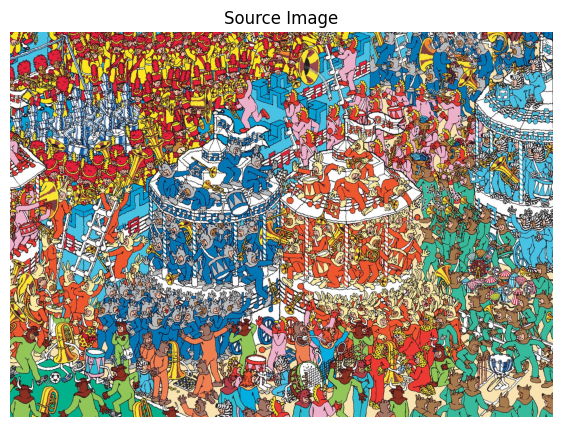

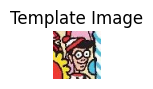

In [50]:
plt.figure(figsize=(10, 5))
plt.imshow(source_img)
plt.title("Source Image")
plt.axis("off")

plt.figure(figsize=(1, 1))
plt.imshow(template_img)
plt.title("Template Image")
plt.axis("off")

plt.tight_layout()
plt.show()

using complete SSD:


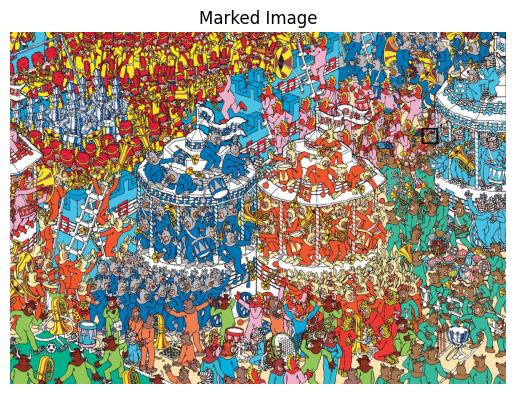

best_position:  (402, 1703)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 1500x500 with 0 Axes>

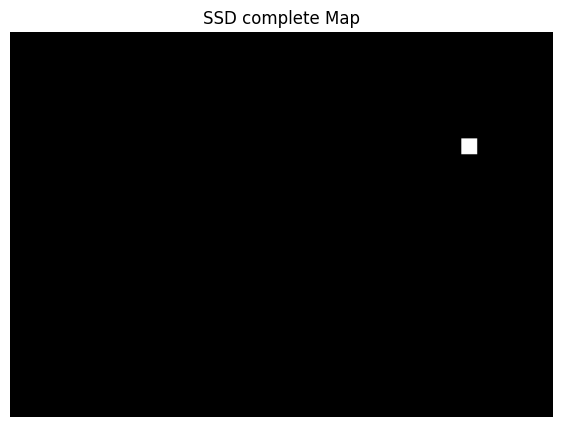

<Figure size 1500x500 with 0 Axes>

In [51]:
print("using complete SSD:")
ssd_complete_map = SSD_Complete_map(source_img, template_img)
# plot the complete SSD map
plt.figure(figsize=(10, 5))
plt.imshow(ssd_complete_map, cmap="gray")
plt.title("SSD complete Map")
plt.axis("off")

# plot
plt.figure(figsize=(15, 5))

## Execute Template Matching

SSD


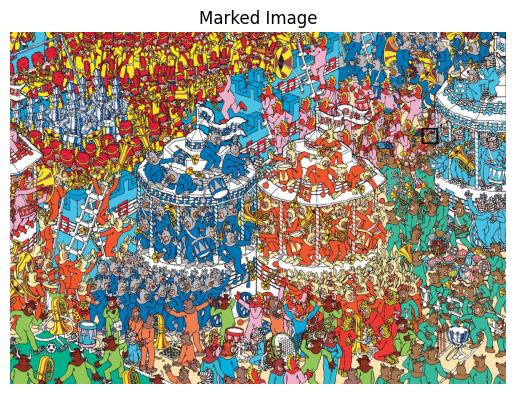

best_position:  (402, 1703)
[[165 164 163 ... 181 185 189]
 [164 162 163 ... 180 184 188]
 [162 161 162 ... 179 180 186]
 ...
 [123 122 121 ... 150 150 150]
 [122 121 119 ... 150 149 149]
 [121 120 119 ... 148 147 146]]


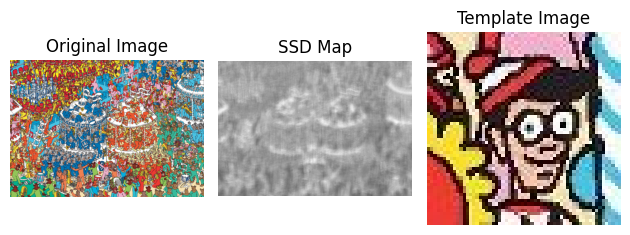

In [52]:
print("SSD")
ssd_map = SSD_map(source_img, template_img)

# Plot original image

plt.subplot(1, 3, 1)

plt.imshow(source_img)

plt.title("Original Image")

plt.axis("off")


# Plot convolution result

plt.subplot(1, 3, 2)

plt.imshow(ssd_map, cmap="gray")

plt.title(f"SSD Map")

plt.axis("off")


# Plot the template image

plt.subplot(1, 3, 3)

plt.imshow(template_img)

plt.title("Template Image")

plt.axis("off")


plt.tight_layout()

plt.show()

using NCC:


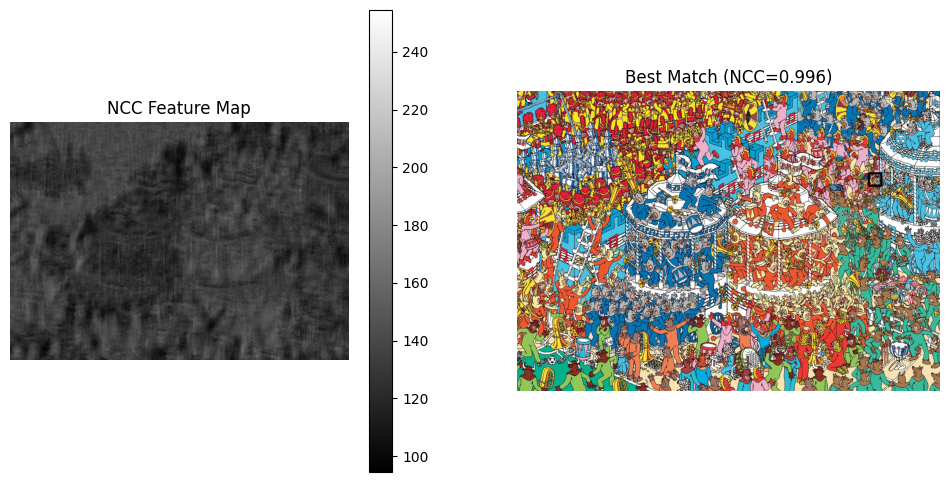

Best position: (402, 1703)


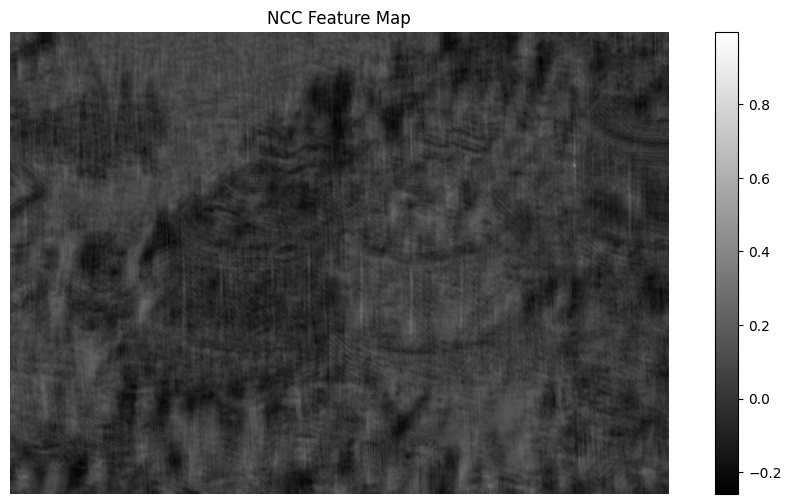

In [53]:
print("using NCC:")
ncc_map = NCC_map(source_img, template_img)

# show ncc_map

plt.figure(figsize=(12, 6))

plt.imshow(ncc_map, cmap="gray")

plt.colorbar()

plt.title("NCC Feature Map")

plt.axis("off")

plt.show()

## Visualization